# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии будут использованы данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data = pd.read_csv('weights_heights.csv', index_col='Index')
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


Построим гистограммы распределения роста и веса подростков.

<AxesSubplot:title={'center':'Height (inch.) distribution'}, ylabel='Frequency'>

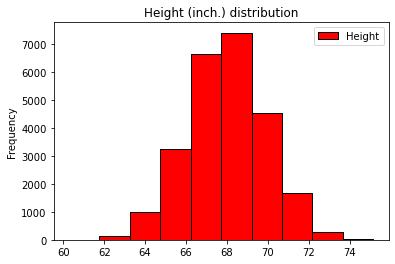

In [6]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution', edgecolor = 'black')

<AxesSubplot:title={'center':'Weight (pound) distribution'}, ylabel='Frequency'>

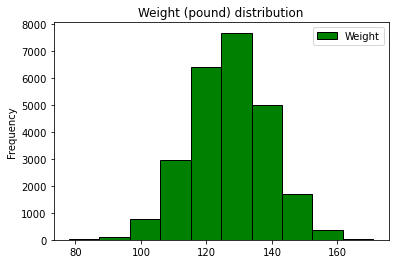

In [7]:
data.plot.hist(y='Weight', color='green',  title='Weight (pound) distribution', edgecolor = 'black')

Функция для вычисления индекса массы тела:

In [8]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [9]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

Отобразим попарные зависимости признаков 'Height', 'Weight' и 'BMI' друг от друга, используя метод pairplot библиотеки Seaborn.

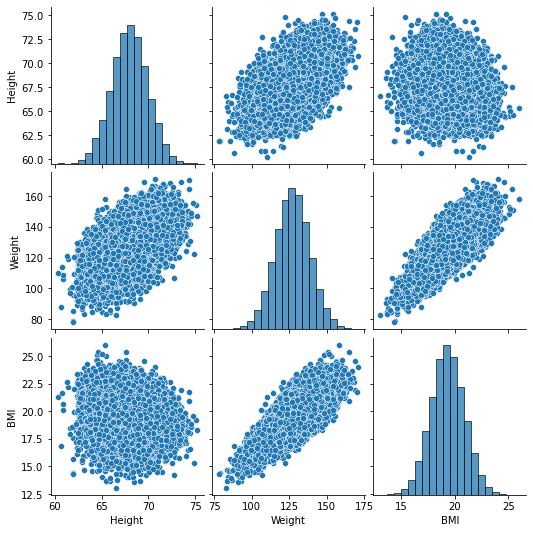

In [10]:
sns.pairplot(data, diag_kws = {'bins':20})

Построим график, демонстрирующий зависимость роста от весовой категории с помощью метода boxplot библиотеки Seaborn. Для этого разделим значение веса на три категории: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. 

<AxesSubplot:xlabel='weight_cat', ylabel='Height'>

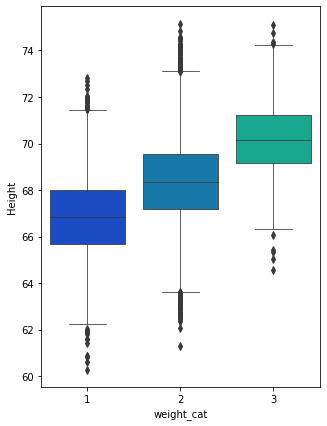

In [9]:
def weight_category(weight):
    pass
    if weight < 120:
        category = 1
    elif weight >= 150:
        category = 3
    else:
        category = 2
    return category
data['weight_cat'] = data['Weight'].apply(weight_category)
plt.figure(figsize=(5,7))
sns.boxplot(x='weight_cat', y='Height', data=data, palette='winter', linewidth=0.8)


Построим scatter plot зависимости роста от веса.

<AxesSubplot:title={'center':'Scatterplot of Height vs Weight'}, xlabel='Weight', ylabel='Height'>

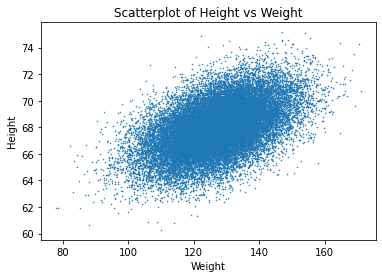

In [10]:
data.plot.scatter(y='Height', x='Weight', s=0.3, title='Scatterplot of Height vs Weight')

# Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

Функция для вычисления квадратичной ошибки:

In [11]:
def squared_error(w_0, w_1):
    error = sum((data['Height']-(w_0+w_1*data['Weight']))**2)
    return error
squared_error(40, 0.5)

32250474.61097678

Добавим на scatter plot две прямые, соответствующие значениям параметров ( 𝑤0,𝑤1)=(60,0.05)  и ( 𝑤0,𝑤1)=(50,0.16). 

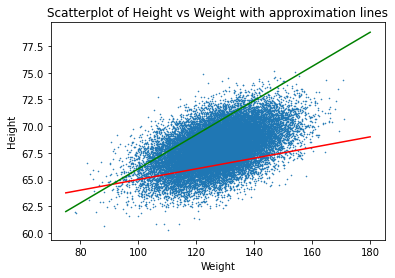

In [12]:
data.plot.scatter(y='Height', x='Weight', s=0.3, title='Scatterplot of Height vs Weight with approximation lines')

x = np.linspace(75,180,25000)
w_0, w_1 = 60, 0.05
y_pred1 = w_0 + w_1*x
plt.plot(x, y_pred1, alpha=1, color='red')

w_0, w_1 = 50, 0.16
y_pred2 = w_0 + w_1*x
plt.plot(x, y_pred2, alpha=1, color='green')

Постром график зависимости функции ошибки от параметра  𝑤1  при фиксированном значении свободного члена  𝑤0  = 50. 

50


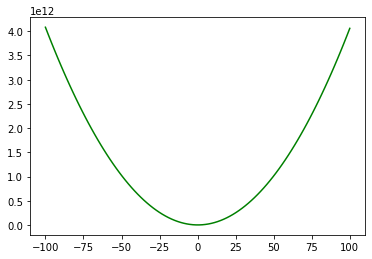

In [13]:
w_1 = np.linspace(-100,100,100)
print(w_0)
SE = [squared_error(w_0, i) for i in w_1]
plt.plot(w_1, SE, alpha=1, color='green')

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

In [14]:
from scipy.optimize import minimize_scalar

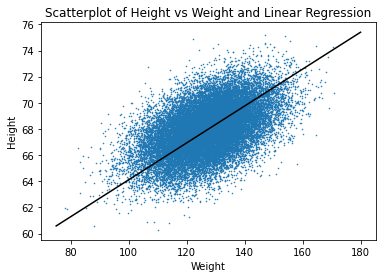

In [15]:
r = minimize_scalar(lambda w_1: squared_error(w_0,w_1),bounds=(-5,5))
w_1_opt = r.x

data.plot.scatter(y='Height', x='Weight', s=0.3, title='Scatterplot of Height vs Weight and Linear Regression')

x = np.linspace(75,180,25000)

y_pred = w_0 + w_1_opt*x
plt.plot(x, y_pred, alpha=1, color='black')


In [16]:
from mpl_toolkits.mplot3d import Axes3D

Построим 3D-график зависимости функции ошибки от параметров $w_0$ и $w_1$:

In [16]:
def squared_error2(x, y):
    error = np.zeros(x.shape)
    for i in range(error.shape[0]):
        for j in range(error.shape[1]):
            error[i,j] =  sum((data['Height']-(x[i,j]+y[i,j]*data['Weight']))**2)
    return error

C:\Users\olmal\AppData\Local\Temp/ipykernel_14540/1812099940.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # get current axis


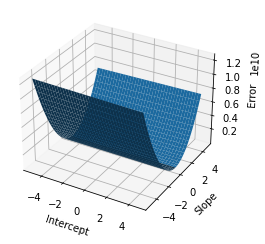

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = squared_error2(X, Y)

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

Найдём минимум функции квадратичной ошибки для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используем метод оптимизации L-BFGS-B.

In [18]:
def squared_error3(params):
    w_0, w_1 = params
    error = sum((data['Height']-(w_0+w_1*data['Weight']))**2)
    return error

In [19]:
from scipy import optimize

array([57.57188014,  0.08200568])

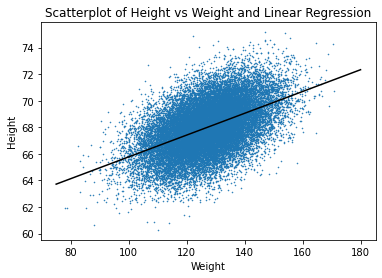

In [20]:
initial_guess = [0, 0]
result = optimize.minimize(squared_error3, initial_guess, method='L-BFGS-B', bounds=([-100,100],[-5,5]))
w_0_opt, w_1_opt = result.x

data.plot.scatter(y='Height', x='Weight', s=0.3, title='Scatterplot of Height vs Weight and Linear Regression')
x = np.linspace(75,180,25000)
y_pred = w_0_opt + w_1_opt*x
plt.plot(x, y_pred, alpha=1, color='black')
result.x
